# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [1]:
!pip install mysql-connector-python

In [2]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [71]:
con = mysql.connector.connect (user = 'user1', password = '7oygWy6P', host = '3.70.140.45', database = 'employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [83]:
cursor = con.cursor()
sql = """
SELECT max(hire_date), min(hire_date) 
FROM employees 
"""

In [43]:
sql

'\nSELECT max(hire_date), min(hire_date) \nFROM employees \n'

In [85]:
cursor.execute(sql)

In [86]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.З використанням con.cursor() виберіть з таблиці `salaries` бази намер співробітника, його останню в базі даних (тобто ту, що відповідає останній `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП. Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

In [13]:
import pandas as pd
cursor_1 = con.cursor()
sql_1 = """ SELECT  DISTINCT emp_no , from_date ,max(to_date ) as to_date 
from salaries s 
GROUP by emp_no """ 

In [88]:
cursor_1.execute(sql_1)

In [91]:
con

In [93]:
df = pd.read_sql(sql_1,con)

C:\Users\user\AppData\Local\Temp\ipykernel_17132\4053640344.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_1,con)


In [114]:
res=df
res.shape

(300024, 3)

In [115]:
res.head(n=3)

,emp_no,from_date,to_date
0,10001,1986-06-26,9999-01-01
1,10002,1996-08-03,9999-01-01
2,10003,1995-12-03,9999-01-01


In [108]:
field_names = [i[0] for i in cursor_1.description]

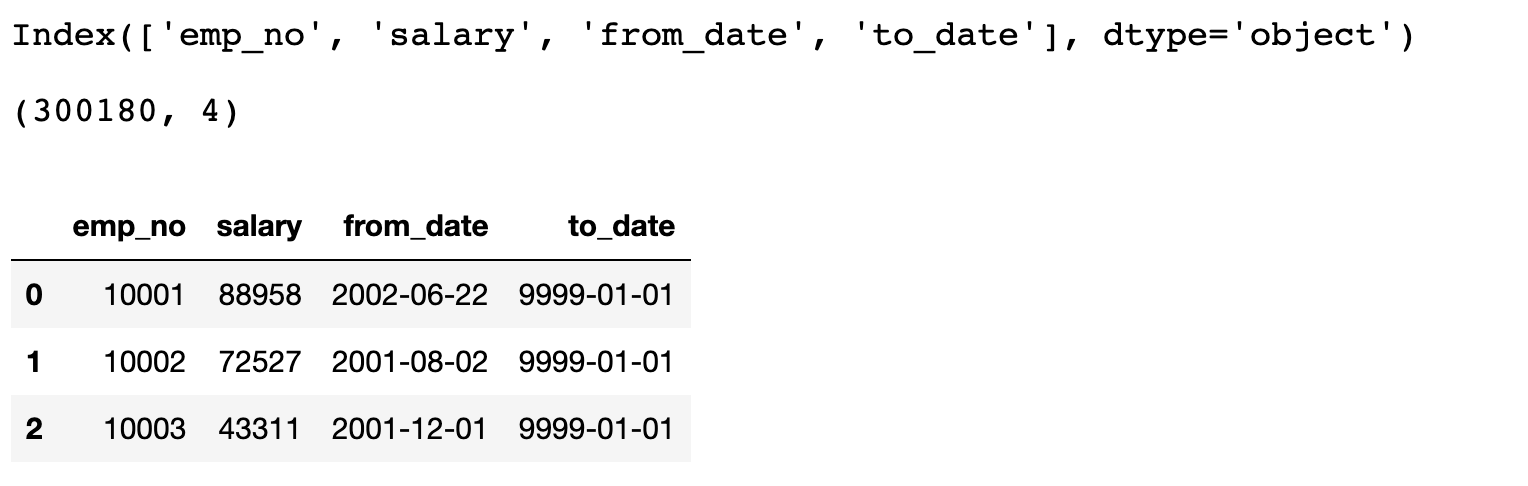

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [116]:
res.dtypes


emp_no        int64
from_date    object
to_date      object
dtype: object

In [125]:
res.to_date.value_counts()

9999-01-01    240124
2000-01-19        36
2000-07-15        35
2000-05-31        34
2001-05-24        33
               ...  
1986-07-13         1
1985-06-08         1
1987-11-01         1
1988-05-16         1
1987-08-25         1
Name: to_date, Length: 5879, dtype: int64

6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [51]:
from matplotlib import pyplot as plt


7.Виведіть кількість співробітників за роком, в який вони були найняті (`hire_date`) використовуючи `pandas.read_sql`. Запишіть результат в змінну `df` та виведіть значення змінної на екран.

In [92]:
cursor_2 = con.cursor()
sql_2 = """ SELECT YEAR (hire_date) as hire_date, COUNT( emp_no) as emp_no 
from employees e 
group by YEAR (hire_date) """

In [97]:
cursor_2.execute(sql_2)

In [98]:
df_1=pd.DataFrame(cursor_2.fetchall())
df_1=df_1.rename(columns = {0:'hire_year',1:'emp_num'})

Очікуваний результат:

In [99]:
df_1

,hire_year,emp_num
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


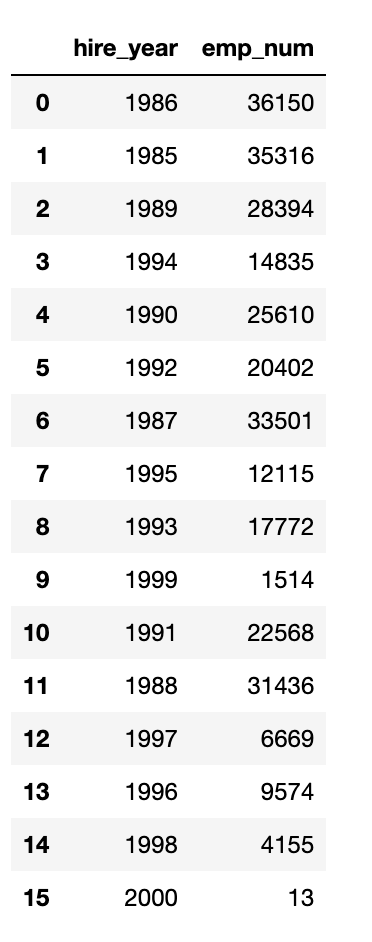

8.Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

Очікуваний результат:

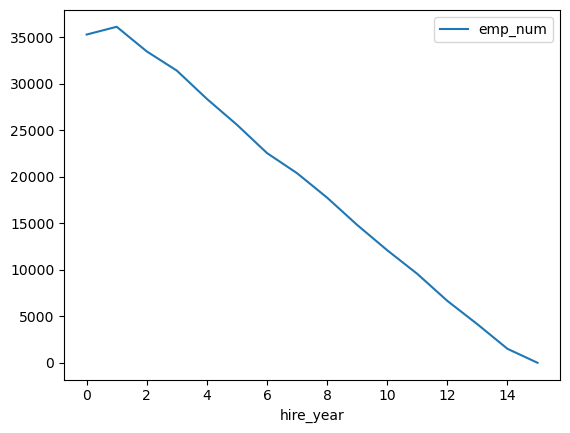

In [131]:
plt.plot(df_1['emp_num'],label='emp_num')
plt.xlabel("hire_year")
plt.legend();

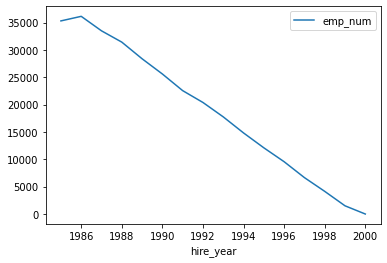

9.З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [73]:
cursor_4 = con.cursor()
sql_4 = """ SELECT timestampdiff(YEAR,from_date,to_date),from_date ,to_date 
from titles t 
WHERE title = 'Engineer' and to_date <> '9999-01-01' """


In [25]:
sql_4

'"SELECT from_date ,to_date , timestampdiff(YEAR,from_date,to_date)\nfrom titles t \nWHERE title = \'Engineer\' and to_date <> \'9999-01-01\''

In [83]:
cursor_4.execute(sql_4)

In [84]:
df_years=pd.DataFrame(cursor_4.fetchall())

In [86]:
df_years=df_years.rename(columns = {0:'duration',1:'from_date',2:'to_date'})

In [87]:
df_years

,duration,from_date,to_date
0,9,1986-12-01,1995-12-01
1,5,1990-02-18,1995-02-18
2,8,1992-12-18,2000-12-18
3,8,1987-04-03,1995-04-03
4,5,1995-03-20,2001-03-19
...,...,...,...
84015,9,1989-11-23,1998-11-23
84016,5,1989-07-30,1994-07-30
84017,0,1993-02-22,1993-10-27
84018,6,1996-05-13,2002-05-13


Очікуваний результат:

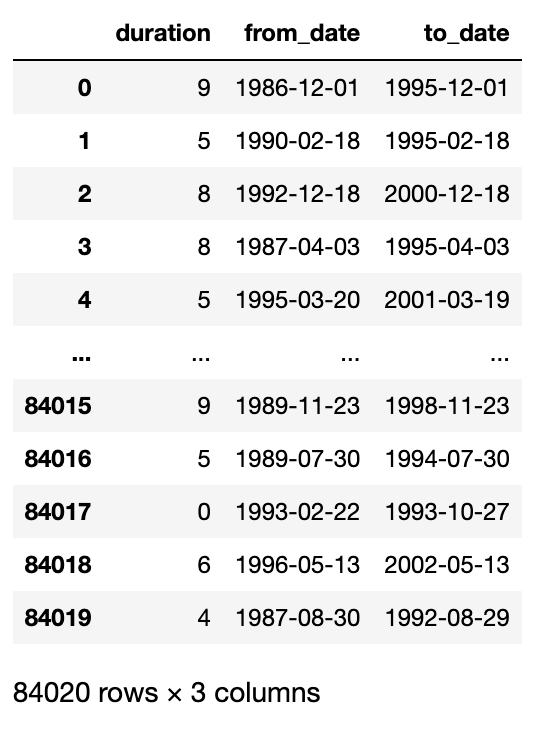

10.Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

''

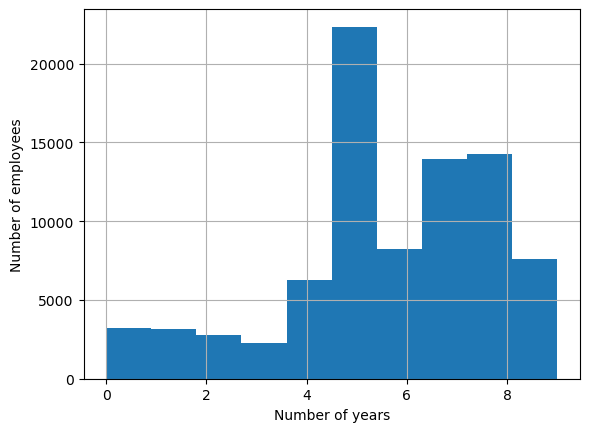

In [111]:
df_years['duration'].hist()
plt.xlabel('Number of years')
plt.ylabel('Number of employees')
;

Очікуваний результат:

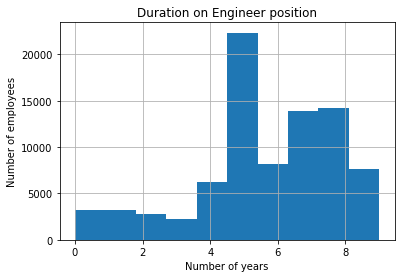

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [5]:
con.close()